In [141]:
import numpy as np

from sklearn import decomposition
from umap import UMAP

from news_vec.encoder import read_preds

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

%matplotlib inline

In [281]:
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

In [221]:
df, embeds = read_preds('data/ab/dc-huffpo/')

100%|██████████| 54/54 [00:01<00:00, 47.34it/s]


In [222]:
df['p_true'] = df.apply(lambda r: r[f'p_{r.domain}'], axis=1)
df['tip'] = df[['domain', 'title']].apply(lambda x: f'{x[0]} - {x[1]}', axis=1)

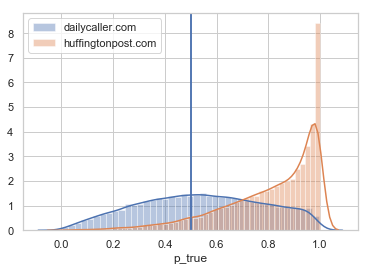

In [223]:
for d in df.domain.unique():
    sns.distplot(df[df.domain==d].p_true, label=d)
    plt.axvline(0.5)
    plt.legend()

# Most correct

In [224]:
for d in df.domain.unique():
    for t in df[(df.domain==d)].sort_values('p_true', ascending=False).head(20).tip:
        print(t)

dailycaller.com - Dem Party Platform Calls For Prosecuting Global Warming Skeptics Via dailycaller
dailycaller.com - Antifa Students Working With ' Trusted Radicals ' To Blast Out ICE Text Alerts
dailycaller.com - Gov't Website Claims Santa Will Move To The South Pole To Escape Global Warming Via dailycaller
dailycaller.com - Liberal Writers Claim Bitcoin Contributes To Global Warming Via dailycaller
dailycaller.com - NYT 's Story On Russian Influence Completely Omits Key Evidence Via dailycaller
dailycaller.com - Gov't Funded Study Claims Global Warming Expanded Sahara Desert — There 's Just One Problem Via dailycaller
dailycaller.com - NYT Claims ' Global Greening ' From CO2 Is ' Terrible , ' Gets Owned
dailycaller.com - Voter Fraud Alert : Dem Scheme ' Highly Suspect ' Via dailycaller
dailycaller.com - NYT ' Slammed ' With Subscription Cancellations After Columnist Dares Question Global Warming Via dailycaller
dailycaller.com - Soros Connected Company Has Provided Voting Technology 

# Most incorrect

In [225]:
for d in df.domain.unique():
    for t in df[(df.domain==d)].sort_values('p_true', ascending=True).head(20).tip:
        print(t)

dailycaller.com - Justin Timberlake Reunites With The ' Selfie Kid ' From The Super Bowl Via dailycaller
dailycaller.com - This Service Helps You Discover New Music , But On Vinyl Via dailycaller
dailycaller.com - ' Etiquette Expert ' Shares Tips On How To Survive Thanksgiving Conversation Via dailycaller
dailycaller.com - How Simulating Near Death Experiences Can Help Build A Closer Office Via dailycaller
dailycaller.com - Left On The Cutting Room Floor : 50 Most Beautiful Dogs Of ' 17 Via dailycaller
dailycaller.com - 112 Year Old Japanese Man Shares His Secrets To A Long Life Via dailycaller
dailycaller.com - Boost Your Career Opportunities By Learning How To Leverage LinkedIn Via dailycaller
dailycaller.com - An X Rated Conversation About LGBTQ & Women In The Military Via dailycaller
dailycaller.com - This Stila Eyeliner Is A Must For Your Makeup Routine
dailycaller.com - Women May Be Flocking To Yoga To Stave Off Mental Illness , New Study Finds Via dailycaller
dailycaller.com - C

In [294]:
def make_points(dfp, embedding):
    points = dfp.copy()
    points['x'] = embedding[:,0]
    points['y'] = embedding[:,1]
    return points

In [295]:
def svd(dfp):
    dr = decomposition.TruncatedSVD(2)
    embedding = dr.fit_transform(embeds[dfp.index])
    return make_points(dfp, embedding)

In [246]:
def pca(dfp):
    dr = decomposition.PCA(2)
    embedding = dr.fit_transform(embeds[dfp.index])
    return make_points(dfp, embedding)

In [260]:
def umap(dfp, metric='cosine', n_neighbors=10, min_dist=0.1):

    dfp = dfp.copy()
    dfp['tokens_key'] = dfp['clf_tokens'].apply(lambda x: tuple(x))
    dfp = dfp.drop_duplicates('tokens_key')
    
    dr = UMAP(verbose=True, metric=metric, n_neighbors=n_neighbors, min_dist=min_dist)
    embedding = dr.fit_transform(embeds[dfp.index])
    
    return make_points(dfp, embedding)

In [248]:
def plot_embedding(points, w=10, h=10, hue='domain', edgecolor='black',
    palette=None, s=40, alpha=0.5, linewidth=0.5, **kwargs):

    plt.figure(figsize=(w,h))

    sns.scatterplot(
        x='x', y='y',
        data=points,
        hue=hue,
        edgecolor=edgecolor,
        linewidth=linewidth,
        alpha=alpha,
        s=s,
        palette=palette,
        **kwargs
    )
    
    plt.show()

In [285]:
def plot_embedding_int(points, width=500, height=500, color='domain', size=20):
    
    chart = (alt
        .Chart(points, width=width, height=height)
        .mark_circle(size=size)
        .encode(x='x', y='y', tooltip='tip', color=color))
    
    chart.display()

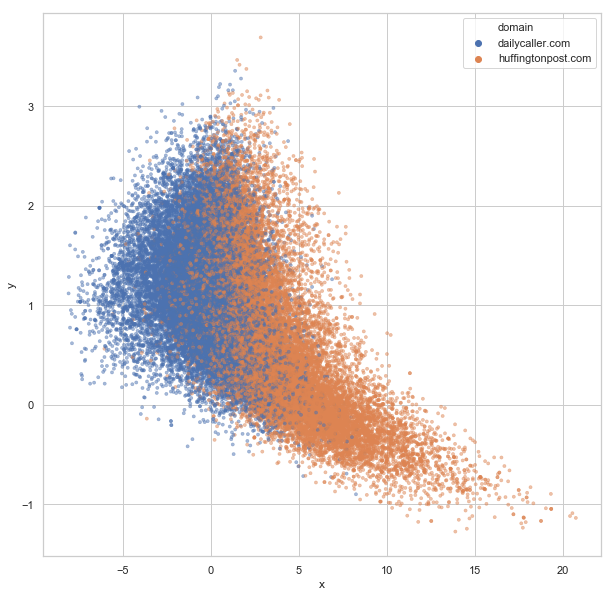

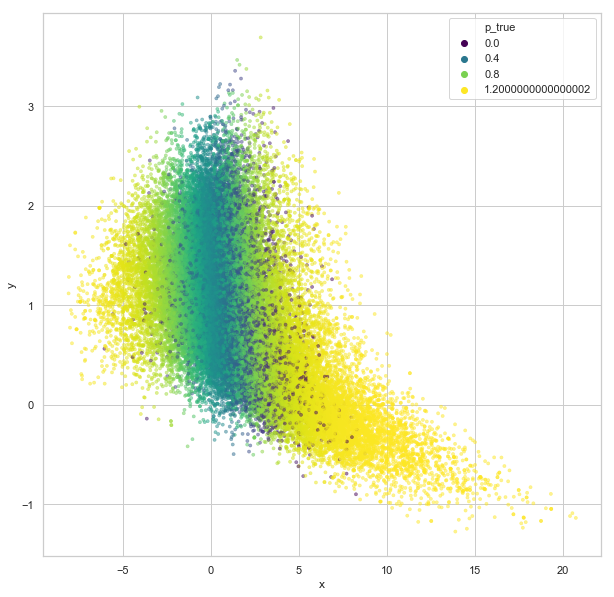

In [256]:
dfp = df[(df.split=='train')]
points = svd(dfp)
plot_embedding(points, edgecolor=None, s=10)
plot_embedding(points, hue='p_true', palette='viridis', s=10, edgecolor=None)

In [308]:
dfp = df[(df.split=='train')]
points = umap(dfp, metric='cosine', min_dist=0.001)

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
   learning_rate=1.0, local_connectivity=1.0, metric='cosine',
   metric_kwds=None, min_dist=0.001, n_components=2, n_epochs=None,
   n_neighbors=10, negative_sample_rate=5, random_state=None,
   repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
   target_metric='categorical', target_metric_kwds=None,
   target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
   transform_seed=42, verbose=True)
Construct fuzzy simplicial set
	 0  /  15
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	 5  /  15
Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs


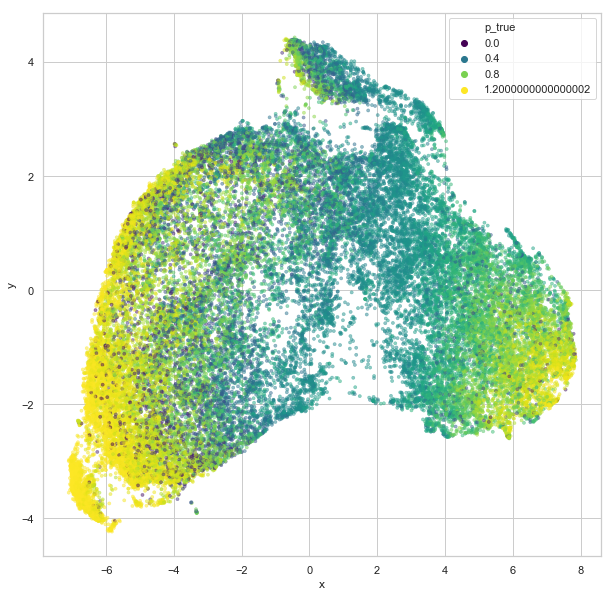

In [309]:
plot_embedding(points, hue='p_true', palette='viridis', s=10, edgecolor=None, w=10, h=10)
# plot_embedding_int(points, color='domain')